# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from sklearn import preprocessing, neighbors
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
#std_price_pandas = prices.std()

 #Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)
#print "Standard deviation of prices in panda: ${:,.2f}".format(std_price_pandas)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

RM – The number of rooms will definitely lead to the increase of the house price value. It is important to notice that t can happen that the price for the extremely big houses (with many rooms) will have price lower that smaller house. Extremely big houses are expensive to maintain so it can be not so reasonable to buy such house for “normal” family. Lower demand foe such extremely big houses can lead to lower price. 

'LSTAT' – is the percentage of lower class increases so it will lead definitively to decrease of price houses. Working poor (lower class) can lead to bigger criminality, lowered (worst) standard of living in neighborhood (worst infrastructure, lower investments rate, worst education standard) and general lower “happiness” to live in such area.

'PTRATIO'  - lower ratio means more teachers per student so I is very positive for quality of education system. Lower ration leads definitively to higher house prices.



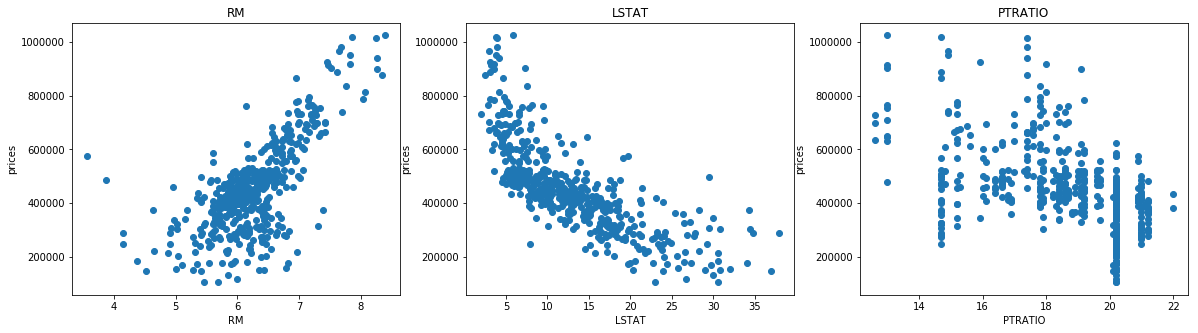

In [4]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

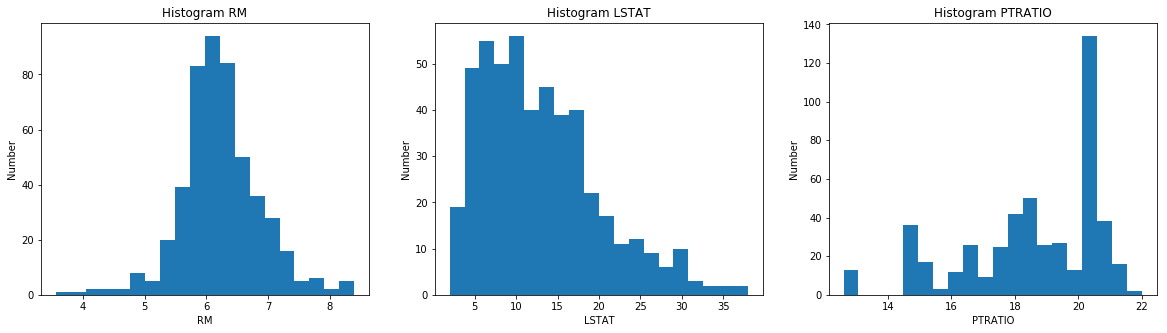

In [5]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    #plt.plot(data[col], prices, 'o')
    plt.hist(data[col], bins = 20)
    plt.title('Histogram ' + col)
    plt.xlabel(col)
    plt.ylabel('Number')


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [6]:
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

#def performance_KNeighborsClassifier(y_true, y_predict):
#    clf = neighbors.KNeighborsClassifier()
#    clf.fit(X_train, y_train)
#    accuracy = clf.score(X_test, y_test)
#    return accuracy

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [7]:
# Calculate the performance of this model
trueValues = [3, -0.5, 2, 7, 4.2]
predictions = [2.5, 0.0, 2.1, 7.8, 5.3]
score = performance_metric(trueValues , predictions)
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)
#accuracy = performance_KNeighborsClassifier([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
#print "Performance_KNeighborsClassifier, of {:.3f}.".format(accuracy)

Model has a coefficient of determination, R^2, of 0.923.


[0.5, -0.5, -0.10000000000000009, -0.7999999999999998, -1.0999999999999996]


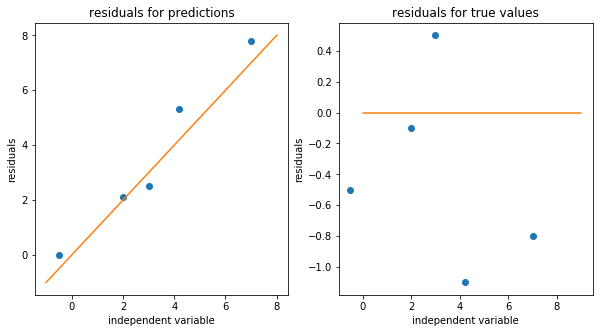

In [8]:
plt.figure(figsize=(10, 5))

residuals = [i - j for i, j in zip(trueValues, predictions)]
print residuals
plt.subplot(1,2,1)
plt.plot(trueValues, predictions, 'o', range(-1,9), range(-1,9), '-')
plt.ylabel('residuals')
plt.xlabel('independent variable')
plt.title('residuals for predictions')
plt.subplot(1,2,2)
plt.plot(trueValues, residuals, 'o',[0,9], [0,0], '-')
plt.ylabel('residuals')
plt.xlabel('independent variable')
plt.title('residuals for true values')

Model has a coefficient of determination, R^2, of 0.923.

Result of 0.923 gives the picture that the model in this case predicts sufficiently good (probablility of correct prediction is 92.3%). In order to check (double check) the corrctness of the model it is possible also to compare directely (from table) each true value and predicted (calculate procentage difference between these to values). For most of these values the difference (error) between true value and predicted is less then 20%. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [9]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

The reason for splitting the data set for training and testing is avoiding the model generalization phenomena. If the model will be learned on the whole data set (without splitting) so it will be higher probability that the model (which was learnt by applying the whole data set) will be not good enough to predict/classify after applying new unseen data set. The model will not work as it was seen during the learning process. It will work perfectly on provided data set but not on unseen data (the model will be “stiff”, perfectly suited only to data which was used during the learning process).
It is extremely important to test a model on unseen data (before model releasing) in order to avoid decreased model accuracy, when the model will be fed by completely new data set. Testing gives possibility to improve the model (in international way).   


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

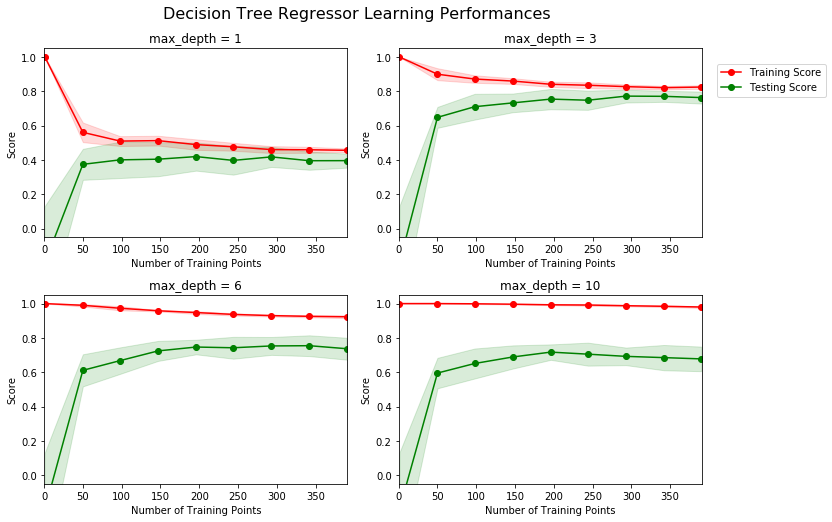

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

I chose the model with max_depth =6. Chosen model is “middle” complicated.

Increase of applied data test point decreases the difference between training and testing score. For the 10 test points the difference is 1 but for the data set 400 is approximately 0.2. 

The score of the training curve slightly decreases (for small amount of test points it predicts with nearly 100% probability). Curve converges to 0.92.

The slope of the testing score curve is steep for test point up 50. More test points make the curve smooth. At 400 test points, testing score curve reaches 0.75.testing score curve reaches 0.75

Testing curve in nearly converged(0.92) so adding more data is actually not necessary at all.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

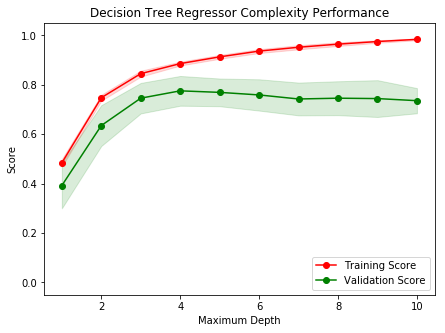

In [11]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

When the model is trained with max_depth = 1, so it can be seen that the model suffers from high bias. Visual cues which can justify given conclusion are that there is a high error for the training score and a gap between training and testing learning curves are rather small (around 0.1) - curves converges.

If the model is trained with higher depth (10) so in this case model suffers from high variance. It is visualized on the depicted curves were large gap between the training and validation scores in the model complexity graph can be seen.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

The model with max depth equals 3 seems to be the model which generalizes best unseen data.

Since the variance for max_depth = 4 is higher than for max_depth = 3, so it is possible to argue that it suffers from higher overfitting. Higher overfitting influences that the model generalize worse.

Therefore, the model with max_depth=3 (which has a lower variance/suffers less from overfitting) generalizes better.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

The grid technique is the technique which allows the researcher to perform analyzes (comparision) between different (defined by researcher) regressors and parameters of these regressors. The output from the grid research is the bunch of sores for chosen repressor and each specified parameter. Applied grid research allows researcher to choose best repressor (maximizes the accuracy score), parameter and fit the data. 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

The cross-validation is the technique which helps evaluating hyperparameters of the investigated model (while performing grid search – the hyperparameters can be checked and optimized).

The concept of cross-validation requires to split whole provided date set on k-folds (cv=5). Training a model is performed on the k-1 folds, k times, and use the remaining fold as the validation set (4 for train and 1 for validation here). For each model, the validation error is calculated (5 errors rates here). Then at the end, all of the error rates are averaged together. 

The benefit of applying cross-validation is to guaranty that all data is used for training and all data is used for validation only once. 
When applying the cross-validated data set, there is a possibility to test the model more times on the the same provided data set (more times because the model is validated k times, each time on different data). The model trained with help of cross-validation is better generalized. 


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [12]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.grid_search import GridSearchCV
    from sklearn.metrics import make_scorer
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 100)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    
    clf = neighbors.KNeighborsClassifier(n_neighbors=2)
    clf.fit(X, y)
    accuracy = clf.score(X, y)
    
    
    
    # Return the optimal model after fitting the data
    #return grid.best_estimator_, accuracy
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [13]:
# Fit the training data to the model using grid search
#reg, accuracy = fit_model(X_train, y_train)
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])
#print "Performance_KNeighborsClassifier, of {:.3f}.".format(accuracy)

Parameter 'max_depth' is 4 for the optimal model.


Max depth for the optimal model is 4 so it equals to estimated depth in question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [14]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3
client_prices = []
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


In [15]:
reg.score(X_test, y_test)

0.77313358571301971

Testing score for regarding model is: 0.773. It means that we can expect that predicted data for the client 1, 2 and 3 are correct with 0.733 probability.

Analyzing the data set in housing.csv it may be concluded that the predicted selling prices match data set with computed score = 0.733.

Client 1 (5 rooms, 17 % poverty, 15% S/T ratio) => predicted price 391.183.33.
In data set for similar price the results are as follows (took average of relevant data for 11 nearest to 391.000 price): 5.93 rooms, 12.99% poverty, 19.79 S/T ratio

Client 2 (4 rooms, 32 % poverty, 22% S/T ratio) => predicted price 189.123.53.
In data set for similar price the results are as follows (took average of relevant data for 2 nearest to 189.000 price): 5.16 rooms, 25.625% poverty, 20.20 S/T ratio

Client 3 (8 rooms, 3 % poverty, 12% S/T ratio) => predicted price 942.666.67.
In data set for similar price the results are as follows (took average of relevant data for 2 nearest to 940.000 price): 8.043 rooms, 3.95% poverty, 16.15 S/T ratio



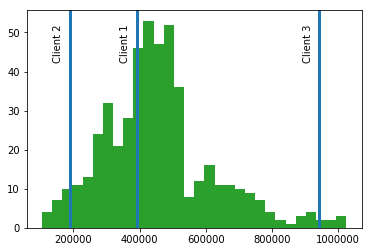

In [16]:
for i,price in enumerate(reg.predict(client_data)):
    plt.hist(prices, bins = 30)
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 50, 'Client '+str(i+1), rotation=90)

The recommended selling prices for each client can be:

a. Client 1: 407,232$

b. Client 2: 229,200$

c. Client 3: 979,300$

Client 3 can sell his house with highest price because as it was discussed before in data exploratory, he owns the biggest house (8 rooms) and the living standard of neighborhood seems to be highest (among the regarding group of clients). The poverty is the lowest and education level stays on the highest level (more teacher per student). Based on these fact it is very reasonable for him to sell with highest price.
On the other hand, the client 2 can sell the house with the lowest prices. He owns the house, where the number of rooms are smallest. In addition, neighborhood of his property seems to be very challenging. Over 30% of neighborhood is qualified as a lower class. Moreover, the education “quality” seems to be the lowest. Schools are overcrowded. The prediction is correct.

In the middle of this group of clients is client 1 who can sell his property little over 400.000$. It can be justified by his can property features which are just in the middle of the features belonged to the client 2 and 3. The number of rooms, poverty of neighborhood and quality of education are moderate (in the middle). 


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [17]:
#vs.PredictTrials(features, prices, fit_model, client_data)
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

1.	Data collected in 1978 seems to be relevant nowadays. Generally, number of rooms point on bigger house so multiplying the price for the square mater and the size of the house makes a totally higher price (for bigger house – as expected). Additionally, people prefer to live in safe neighborhood where criminally is very low. It can be guaranteed by lower poverty of neighborhood and higher standard of education system. Lower poverty can be extrapolated for the other features (like better standard of infrastructure, higher level of investments, etc.).
2.	Data features describing the home is not sufficient. Today, people would like to know more details about how old the house is, what energy class the house belongs to, how much it costs to perform maintenance, how much the owner needs to pay for the property (to government), how many bathrooms the house has and if the kitchen is renovated. 
3.	The model seems to be so much robust. It contains very few features to predict well enough. As it can be seen in sensitivity analysis the range in prices is approximately 18% of the mean price.
4.	 Collected data will be not applicable in a rural city. For such area other features will play predominant role (e.g possibility to purchase the land, access to important infrastructure, distance to bigger city, weather conditions, etc.). Collected data can be used only (with some exceptions) in other area but each place should be considered separately (for each region there is a need to build separate model).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.